# Homework 3

 - Name: Bundhoo Simriti
 - Student Id: 1006281

## Question 3

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
def load_and_prepare_data(file_path):
    data = pd.read_csv(file_path)
    feature_df = data[data.columns[1:]]
    target_df = data[data.columns[0]]
    X_train = feature_df.to_numpy()
    y_train = target_df.to_numpy()
    return X_train, y_train

In [24]:
# Sigmoid function
def sigmoid(val):
    y = 1/(1 + np.exp(-val))
    return y

In [25]:
def calculate_log_likelihood(X, y, weights):
    z = np.dot(X, weights)
    return np.sum(y * z - np.log(1 + np.exp(z)))

In [26]:
#Logistic Regression
def stochastic_gradient_descent(X, y, weights, iters, learning_rate, save_interval):
    n_samples, n_features = X.shape
    n_weights = weights.copy()
    log_likelihoods = []

    for i in range(iters):
        idx = np.random.randint(n_samples)
        x_i, y_i = X[idx], y[idx]

        z = np.dot(x_i, n_weights)
        prediction = sigmoid(z)
        gradient = x_i * (y_i - prediction)

        n_weights += learning_rate * gradient

        # Calculate log-likelihood and save every 'save_interval' iterations
        if (i + 1) % save_interval == 0:
            log_likelihood = calculate_log_likelihood(X, y, n_weights)
            log_likelihoods.append(log_likelihood)

    return n_weights, log_likelihoods

In [27]:
def plot_log_likelihood(iterations, log_likelihoods):
    plt.plot(iterations, log_likelihoods)
    plt.xlabel('Iterations')
    plt.ylabel('Log-Likelihood')
    plt.title('Log-Likelihood vs. Iterations')
    plt.show()

In [28]:
def identify_top_features(weights):
    abs_weights = np.abs(weights)
    top_five_indices = np.argsort(abs_weights)[-5:]
    top_five_features = [f'x{i+1}' for i in top_five_indices[::-1]]
    return top_five_features

In [29]:
def main():
    # Step 1: Load the training data
    train_file = 'train_diabetes.csv'
    X_train, y_train = load_and_prepare_data(train_file)

    # Step 2: Implement logistic regression model with SGD
    learning_rate = 0.1
    n_iterations = 10000
    save_interval = 100

    initial_weights = np.zeros(X_train.shape[1])
    weights, log_likelihoods = stochastic_gradient_descent(X_train, y_train, initial_weights, n_iterations, learning_rate, save_interval)

    # Step 3: Train the model with SGD
    iterations = np.arange(save_interval, n_iterations + 1, save_interval)

    # Step 4: Plot log-likelihood at every 100 iterations
    plot_log_likelihood(iterations, log_likelihoods)

    # Step 5: Identify the five features with the highest absolute weights
    top_five_features = identify_top_features(weights)
    print(f"The five most important features are: {', '.join(top_five_features)}")

<ipython-input-24-e51a2863ee9a>:3: RuntimeWarning: overflow encountered in exp
  y = 1/(1 + np.exp(-val))


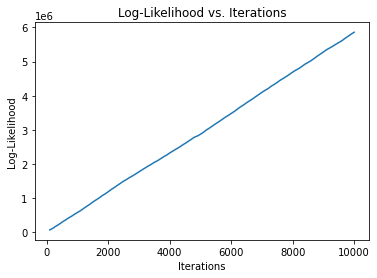

The five most important features are: x2, x19, x3, x1, x20


In [30]:
if __name__ == "__main__":
    main()

**From the values of the weights obtained, which five features do you think are the most important? How did you choose these five features?**

(Please the algorithm to see the five features outputted.)
<br>
<br>
The method identify_top_features(weights) chooses the five features according as they had the highest weights by first sorting them in descending order and then copying and outputting the first five entries. The magnitude of weights will have the greatest impact on predicting the target variable and will thus significantly contribute to the model's decision-making process.